In [1]:
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import os
import shutil
import random
import cv2 # type: ignore
import matplotlib.pyplot as plt # type: ignore
import tensorflow as tf # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input # type: ignore
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.metrics import confusion_matrix # type: ignore
import seaborn as sns  # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.svm import SVC # type: ignore
from sklearn.metrics import accuracy_score # type: ignore


In [2]:

zfnet = Sequential([
    Input(shape=(48, 48, 3)),  # CIFAR-10 images are 32x32x3
    Conv2D(96, (7, 7), strides=2, activation='relu', padding='same'),
    MaxPooling2D((3, 3), strides=2),  # Output becomes 16x16x96
    Conv2D(256, (5, 5), strides=2, activation='relu', padding='same'),
    MaxPooling2D((3, 3), strides=2, padding='same'),  # Ensure padding to avoid negative dimensions
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((3, 3), strides=2, padding='same'),  # Final size depends on padding
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(2, activation='softmax')  # 2 classes
])

# Model summary
zfnet.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 96)     │        14,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,714,370 (94.28 MB)

 Trainable params: 24,714,370 (94.28 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Resize image to 48 * 48 data in folder data_copy 


def resize_image(path):
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (48, 48))
            cv2.imwrite(img_path, img)
        else:
            print(f"Failed to read image: {img_path}")

        
resize_image(r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\test\DROWSY')
resize_image(r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\test\NATURAL')
resize_image(r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\train\DROWSY')
resize_image(r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\train\NATURAL')






In [4]:
# Convert all image in folder data_copy to GrayScale
def convert_to_gray_scale(path):
    if not os.path.exists(path):
        print(f"Directory {path} does not exist.")
        return
    files = os.listdir(path)
    for file in files:
        img = cv2.imread(os.path.join(path, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(path, file), img)

convert_to_gray_scale(r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\train\DROWSY')
convert_to_gray_scale(r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\train\NATURAL')
convert_to_gray_scale(r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\test\DROWSY')
convert_to_gray_scale(r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\test\NATURAL')


In [5]:

# Create data generator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\train',
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    r'C:\Users\pron\Documents\I4-AMS\Research_Method\Project_Drowsy_Driver_Alert\data_copy\test',
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical'
)




Found 6764 images belonging to 2 classes.
Found 2402 images belonging to 2 classes.


In [6]:
# Check data generator
x, y = next(train_generator)
print(x.shape, y.shape)

(64, 48, 48, 3) (64, 2)


In [7]:
x

array([[[[0.5647059 , 0.5647059 , 0.5647059 ],
         [0.5686275 , 0.5686275 , 0.5686275 ],
         [0.5686275 , 0.5686275 , 0.5686275 ],
         ...,
         [0.49803925, 0.49803925, 0.49803925],
         [0.6156863 , 0.6156863 , 0.6156863 ],
         [0.5647059 , 0.5647059 , 0.5647059 ]],

        [[0.5568628 , 0.5568628 , 0.5568628 ],
         [0.5568628 , 0.5568628 , 0.5568628 ],
         [0.5568628 , 0.5568628 , 0.5568628 ],
         ...,
         [0.4039216 , 0.4039216 , 0.4039216 ],
         [0.6627451 , 0.6627451 , 0.6627451 ],
         [0.60784316, 0.60784316, 0.60784316]],

        [[0.54509807, 0.54509807, 0.54509807],
         [0.54901963, 0.54901963, 0.54901963],
         [0.54901963, 0.54901963, 0.54901963],
         ...,
         [0.33333334, 0.33333334, 0.33333334],
         [0.4901961 , 0.4901961 , 0.4901961 ],
         [0.49803925, 0.49803925, 0.49803925]],

        ...,

        [[0.6156863 , 0.6156863 , 0.6156863 ],
         [0.17254902, 0.17254902, 0.17254902]

In [8]:
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [9]:
zfnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


In [11]:
# Model checkpoint callback
checkpoint = ModelCheckpoint('zfnet.keras', save_best_only=True)

In [12]:

# Train the model
history = zfnet.fit(train_generator, validation_data=test_generator, epochs=10, callbacks=[early_stopping, checkpoint])


Epoch 1/10


c:\Users\pron\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


106/106 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.6165 - loss: 0.8304 - val_accuracy: 0.8168 - val_loss: 0.3878
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 56s 525ms/step - accuracy: 0.9023 - loss: 0.2382 - val_accuracy: 0.9080 - val_loss: 0.2651
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 56s 529ms/step - accuracy: 0.9625 - loss: 0.1084 - val_accuracy: 0.8639 - val_loss: 0.4367
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 65s 616ms/step - accuracy: 0.9816 - loss: 0.0570 - val_accuracy: 0.9629 - val_loss: 0.2469
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 61s 567ms/step - accuracy: 0.9842 - loss: 0.0427 - val_accuracy: 0.8834 - val_loss: 0.4046
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 59s 559ms/step - accuracy: 0.9874 - loss: 0.0355 - val_accuracy: 0.8943 - val_loss: 0.4660
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 57s 532ms/step - accuracy: 0.9922 - loss: 0.0254 - val_accuracy: 0.8834 - val_loss: 0.4633
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 53s 497ms/step - accuracy: 0.9858 - loss: 0.0433 - val_a

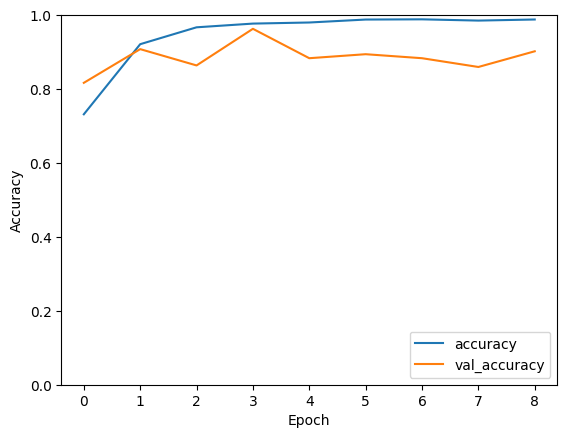

In [13]:

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [14]:
# Evaluate the model
loss, accuracy = zfnet.evaluate(test_generator)
print(f'Test accuracy: {accuracy:.2f}')



38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.8959 - loss: 0.3040
Test accuracy: 0.90


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step


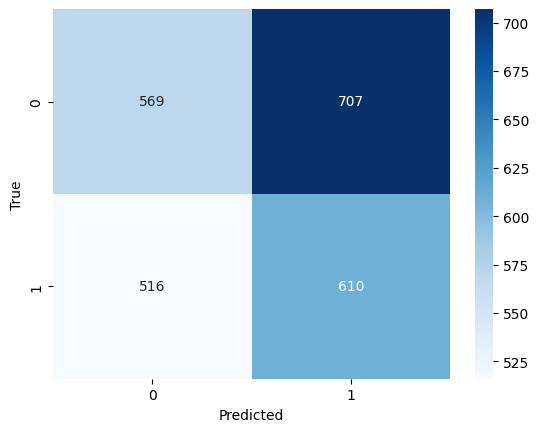

In [15]:
# Check Confusion matrix
y_pred = zfnet.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()





In [16]:

# Check F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.49


In [17]:
# Area Under the ROC Curve 
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_true, y_pred)
print(f'ROC AUC: {roc_auc:.2f}')


ROC AUC: 0.49


In [18]:
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')


Precision: 0.50


In [19]:
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE: {mae:.2f}')


MAE: 0.51
